In [1]:
import pandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
import piplite

await piplite.install(['scikit-learn'])

Read dataset

In [3]:
df=pd.read_csv("FuelConsumption.csv")

Data Description and analysis

In [4]:

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 87.6+ KB


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Data visualization

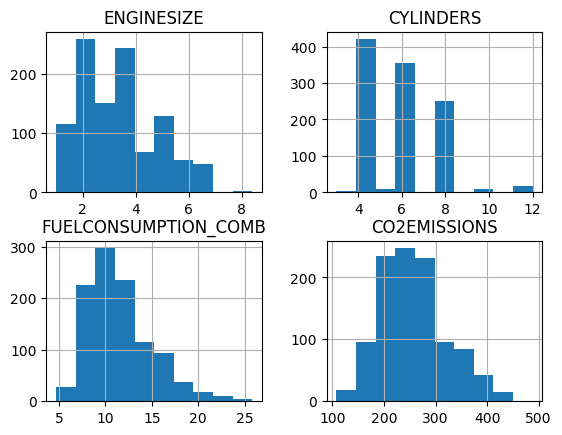

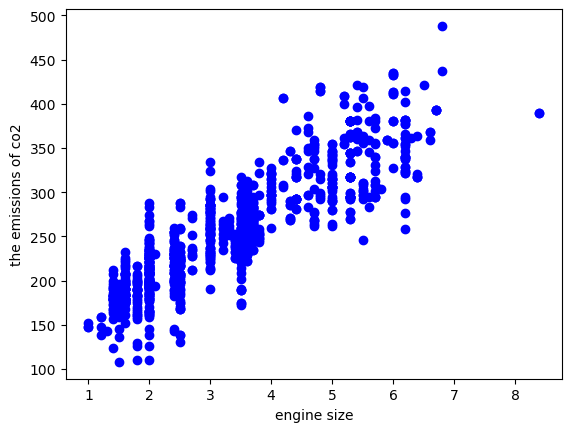

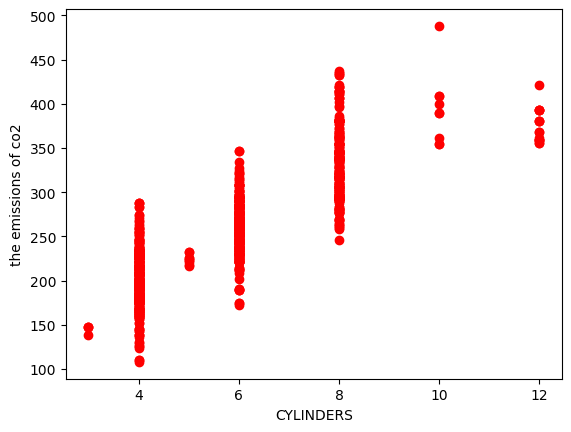

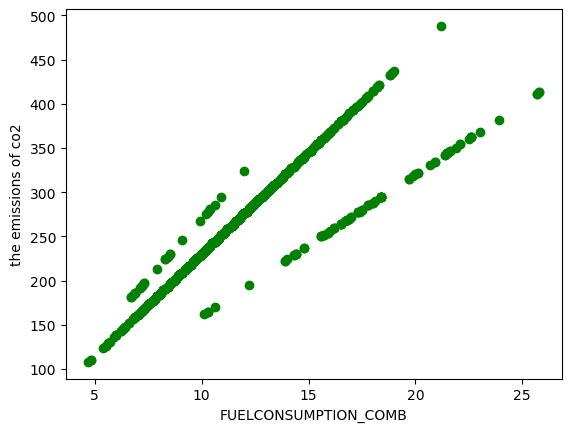

In [5]:
some_features=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
some_features.hist()
plt.show()
plt.scatter(some_features.ENGINESIZE,some_features.CO2EMISSIONS, color='blue')
plt.xlabel("engine size")
plt.ylabel("the emissions of co2")
plt.show()

plt.scatter(some_features.CYLINDERS,some_features.CO2EMISSIONS, color='red')
plt.xlabel("CYLINDERS")
plt.ylabel("the emissions of co2")
plt.show()

plt.scatter(some_features.FUELCONSUMPTION_COMB,some_features.CO2EMISSIONS, color='green')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("the emissions of co2")
plt.show()

Creating train and test dataset

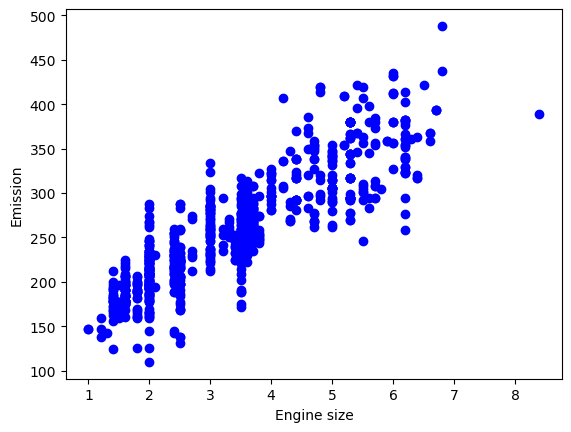

In [6]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df,test_size=0.2,random_state=42,shuffle=True)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Training a regression model using the ENGINESIZE feature.

Coefficients:  [[38.99297872]]
Intercept:  [126.28970217]
Mean absolute error: 24.10
Residual sum of squares (MSE): 985.94
R2-score: 0.76


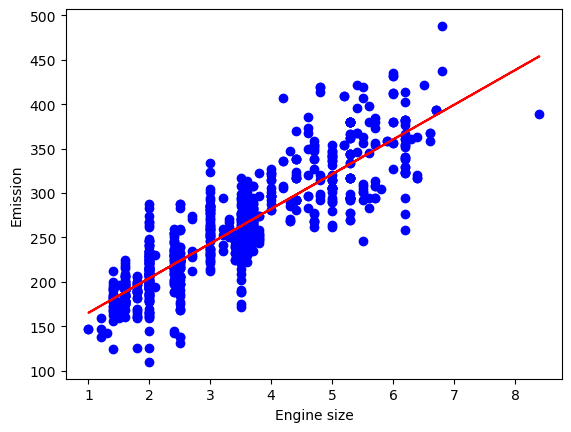

In [7]:
from sklearn import linear_model
model=linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
model.fit(train_x,train_y)
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
pred_y = model.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(pred_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , pred_y) )

Training a regression model using the FUELCONSUMPTION_COMB feature.

Coefficients:  [[16.18090078]]
Intercept:  [69.10302618]
Mean absolute error: 20.44
Residual sum of squares (MSE): 797.43
R2-score: 0.81


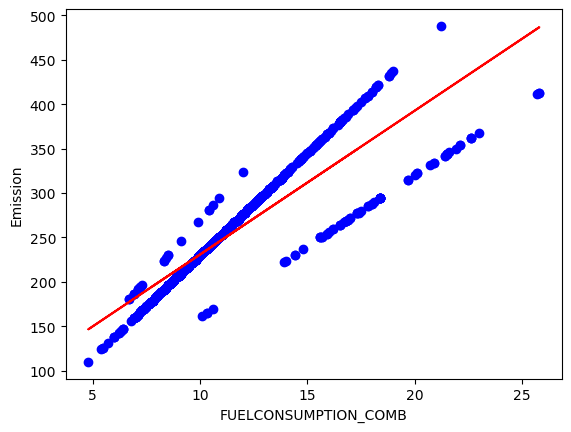

In [8]:
from sklearn import linear_model
model2=linear_model.LinearRegression()
train_x2 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y2 = np.asanyarray(train[['CO2EMISSIONS']])
model2.fit(train_x2,train_y2)

print ('Coefficients: ', model2.coef_)
print ('Intercept: ',model2.intercept_)
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x2, model2.coef_[0][0]*train_x2 + model2.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")


test_x2 = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y2 = np.asanyarray(test[['CO2EMISSIONS']])
pred_y2 = model2.predict(test_x2)

print("Mean absolute error: %.2f" % np.mean(np.absolute(pred_y2 - test_y2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred_y2 - test_y2) ** 2))
print("R2-score: %.2f" % r2_score(test_y2 , pred_y2) )


Multi Linear regression

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Mean Squared error(MSE): %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))


Coefficients:  [[11.24245948  7.01602813 25.26626471 -8.28459694 -7.5814794 ]]


/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Mean Squared error(MSE): 511.37
Variance score: 0.88
